# Sentiment Analysis on the Andoird app reviews using lexicon based

**Data Preprocessing Techniques on Reviews**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings

In [2]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv(r"D:\Sentiment_InfosysIntern\data_preprocessing\reviews.csv",encoding='latin-1')

In [4]:
df.head(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Smart Grocery List From Hell. While it might b...,19,4.12.0.5,17-01-2019 00:09,Please note that you can turn off the smart li...,30-01-2019 15:18,4.12.0.5,most_relevant,com.anydo
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,https://play-lh.googleusercontent.com/a-/ALV-U...,Wunderlist was everything I needed and I had n...,6,NaN,30-04-2020 06:46,"Any.do is a task management app, which has no ...",03-05-2020 10:27,NaN,most_relevant,com.anydo
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,https://play-lh.googleusercontent.com/a/ACg8oc...,I have had this app for almost a year. I was r...,84,5.15.2.1,07-11-2021 15:58,This could happen if a user pressed on an adve...,08-11-2021 14:36,5.15.2.1,most_relevant,com.anydo
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Almost perfect but the developers choose to ig...,3,NaN,07-07-2019 15:10,Popups have been proven to increase productivi...,09-07-2019 11:09,NaN,most_relevant,com.anydo
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very annoyed that I have to keep signing in an...,29,4.15.8.11,29-09-2019 16:03,"Hi, that's odd, please send us a bug report in...",02-10-2019 19:51,4.15.8.11,most_relevant,com.anydo


In [5]:
df['content']=df['content'].str.lower()

In [45]:

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# do we neeed to customize the stop words as per data??

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'down', 'could', 'no', 'itself', 'himself', 'between', 'shouldn', 'would', 'until', 'them', 'i', 'once', "mustn't", "mightn't", 'its', "shouldn't", 'can', 'ain', "won't", 'ma', 'haven', 'do', 'into', 'doing', 'were', 'to', 'll', 'if', "you've", 'again', 'and', 'the', 'any', 'during', 'are', 'm', 'than', 'these', 'her', 'this', 'most', 'up', 've', "didn't", 'such', 'being', 'then', 'why', 'y', 'has', 'there', 'shall', 'by', 'will', 'how', 'he', 'through', 'don', 'won', "needn't", "couldn't", 'shan', 'wasn', 'couldn', 'ourselves', 'a', 'off', 'wouldn', 'out', 'mightn', 'have', 'more', 'as', 'myself', 'further', 'in', 'below', 'my', 'him', 'themselves', 'very', "aren't", 'theirs', 'about', "should've", "weren't", "she's", 'all', 'just', "hasn't", 'be', 'his', 'that', 'under', 'hadn', 'does', 'isn', 'own', "doesn't", 'our', 'only', 'should', "isn't", "you'll", 'because', "haven't", 'been', 'ours', 'on', 'against', 'didn', "you're", 'they', 'yourselves', 'she', 'yours', 'had', 'here', 'fro

**Data cleaning and preprocessing pipeline**

In [7]:
df = df.dropna(subset=['content'])  # removing the rows which has null values in content column

In [8]:
df.isna().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
thumbsUpCount              0
reviewCreatedVersion    2357
at                         0
replyContent            7619
repliedAt               7619
appVersion              2357
sortOrder                  0
appId                      0
dtype: int64

In [9]:
def create_slang_dictionary(filename):
    chart_words = {}
    with open(filename, 'r') as file:
        for line in file:
            # Remove trailing newline character
            line = line.strip()
            # Split the line on the equals sign (=)
            abbreviation, meaning = line.split('=')
            chart_words[abbreviation] = meaning

    return chart_words

# Example usage
filename = r"D:\Sentiment_InfosysIntern\data_preprocessing\slang.txt"  # Replace with your actual filename
chart_words = create_slang_dictionary(filename)
print(chart_words)


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great', 'G9': 'Genius', 'IC': 'I See', 'IDK': 'I Do not know', 'ICQ': 'I Seek you', 'ILU': 'I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh', 'LOL': 'Laughing out loud',

In [10]:

def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',text)
    
def remove_special_character(content): # removes punctuations
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)#return re.sub('\[[^&@#!]]*\]','',content)

#Removal of URLs
def remove_url(content): 
    return re.sub(r'http\S+', '', content)

# remove stop words from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def replace_string(text,chart_words):
    words = text.split()
    new_words = []
    for word in words:
        if word.upper() in chart_words:
            new_words.append(chart_words[word.upper()])  
        else:
            new_words.append(word)
    return " ".join(new_words)  
    

In [11]:
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    return content
    

**Data preprocessing**

In [12]:
#Data preprocessing
def data_cleaning(content):
    if not pd.isna(content):  # Check for missing values (NaN) Issue solved as the null values as passed as float
        content = remove_html_tags(content)
        content = remove_url(content)
        content = remove_special_character(content)
        content = contraction_expansion(content)
        content = replace_string(content,chart_words) # Expanded
        content = remove_stopwords(content)
    return content


**Data cleaning**

In [13]:
df['content']=df['content'].apply(data_cleaning)

In [14]:
print(df['content'][10])

longer usable awful used free app years grocery lists simply laid easy use years created lists easily check uncheck reminders needed store not know happened last months app become useless exhaustive waste tears eyes completely erases items typed checked saved lists leaving waste tears eyes retype things uninstalled reinstalled nothing works


<Lemmatiation as needed to get the precise words meaning for obtaining the core details of app faults clearly>

!Lemmatization as needed to get the exact meaning of the customer query to address the app's fault

In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [16]:
df['content']

0        recurring task every day need list reminder bu...
1        instead shopping around downloaded widely used...
2        every blue app asks update acct email everythi...
3        terrible update app used perfect planning cert...
4        app deceivingly terrible really nice design fe...
                               ...                        
16782                                        excellent app
16783    love easy use make life organize love way put ...
16784        love make plan check app almost everyday love
16785                                       exactly needed
16786                                               good ð
Name: content, Length: 16786, dtype: object

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Data Overview**

In [17]:
df['content'].describe()

count     16786
unique    13114
top        good
freq        131
Name: content, dtype: object

In [18]:
print('Unique reviews:%s'% df.content.nunique())
print('Unique reply count:%s'% df.replyContent.nunique()) # just to curious to see

Unique reviews:13114
Unique reply count:6412


**Exploratory Data Analysis**

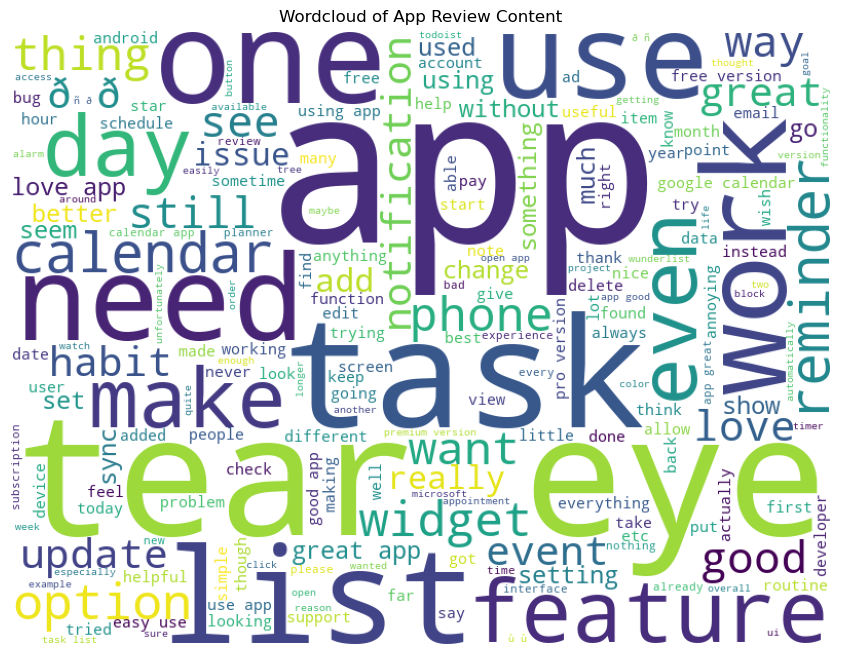

In [21]:
wordcloud = WordCloud(width=800, height=600, background_color="white")
# Generate the wordcloud from the preprocessed content
wordcloud.generate(" ".join(df['content']))
# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Wordcloud of App Review Content")
plt.show()

### Lexicon-based analysis of positive , neutral , negative words in review

In [22]:
def get_sentiment_score(text, lexicon):
    score = 0
    words = text.split()
    for word in words:
        if word.lower() in lexicon: # lexicon is a dict-> "words:score"
            score += lexicon[word.lower()]
    return score

def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else: # score=0
        return 'neutral'


In [25]:
!pip install afinn

                                              0.0/52.6 kB ? eta -:--:--
     -------                                  10.2/52.6 kB ? eta -:--:--
     -----------------------------          41.0/52.6 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 52.6/52.6 kB 388.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53439 sha256=6dcfe6911dd64382978e17f1b333019ee221596202eb1348fd2d6b140b5cecb1
  Stored in directory: c:\users\laksh\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
# lexicons -> score= (positive words -negative words )/(words)
from afinn import Afinn
afinn = Afinn()
def get_afinn_score(text):
    return afinn.score(text)

def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [49]:
df['sentiment_score'] = df['content'].apply(get_afinn_score)

In [50]:
df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

In [51]:
df[['content','sentiment_label']].head(10)

,content,sentiment_label
0,recurring task every day need list reminder bu...,negative
1,instead shopping around downloaded widely used...,positive
2,every blue app asks update acct email everythi...,negative
3,terrible update app used perfect planning cert...,positive
4,app deceivingly terrible really nice design fe...,neutral
5,smart grocery list hell handy sort list catago...,negative
6,wunderlist everything needed issue app replace...,positive
7,app almost year really enjoying mostly used gr...,neutral
8,almost perfect developer choose ignore one imp...,negative
9,annoyed keep signing deleted list ive working ...,positive
